# Imports

In [1]:
import pandas as pd
for i in range(1,6):
    vars()['df_{}'.format(i)] = pd.read_csv('views_2019\involved_parts\involved_parts_{}.csv'.format(i))
    
dfs = [df_1, df_2, df_3, df_4, df_5]
df = pd.concat([dfi for dfi in dfs])

C:\Users\yaminb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
for col in df.columns:
    print(col)

accident_id
provider_and_id
provider_code
file_type_police
involved_type
involved_type_hebrew
license_acquiring_date
age_group
age_group_hebrew
sex
sex_hebrew
involve_vehicle_type
involve_vehicle_type_hebrew
safety_measures
safety_measures_hebrew
involve_yishuv_symbol
involve_yishuv_name
injury_severity
injury_severity_hebrew
injured_type
injured_type_hebrew
injured_position
injured_position_hebrew
population_type
population_type_hebrew
involve_home_region
involve_home_region_hebrew
involve_home_district
involve_home_district_hebrew
involve_home_natural_area
involve_home_natural_area_hebrew
involve_home_municipal_status
involve_home_municipal_status_hebrew
involve_home_yishuv_shape
involve_home_yishuv_shape_hebrew
hospital_time
hospital_time_hebrew
medical_type
medical_type_hebrew
release_dest
release_dest_hebrew
safety_measures_use
safety_measures_use_hebrew
late_deceased
late_deceased_hebrew
car_id
involve_id
accident_year
accident_month
provider_code_hebrew
accident_timestamp
accide

In [63]:
llist = df.loc[df['road1'] == 77]['road_segment_number'].unique()
sorted(llist)

[1.0, 2.0, 10.0, 20.0, 30.0, 35.0, nan]

In [48]:

df.loc[df['road_segment_id'] == 770010][:3][['road_segment_number', 'road_segment_id', 'road_segment_name' ,'road1','road2','accident_hour_raw_hebrew', 'accident_severity', 'accident_severity_hebrew']] 
#'accident_hour','accident_minute', 'accident_year','accident_month']]

,road_segment_number,road_segment_id,road_segment_name,road1,road2,accident_hour_raw_hebrew,accident_severity,accident_severity_hebrew
627,10.0,770010.0,מחלף בית רימון - מחלף גולני,77.0,754.0,NaN,2,קשה
9596,10.0,770010.0,מחלף בית רימון - מחלף גולני,77.0,754.0,NaN,2,קשה
13931,10.0,770010.0,מחלף בית רימון - מחלף גולני,77.0,0.0,00:00-00:59,3,קלה


# All accidents 

In [53]:
from collections import defaultdict
years = sorted(df['accident_year'].unique(), reverse=True)
months = range(1,13,1)

months_dict = {curr_m: 0 for curr_m in months}
accidents = defaultdict(dict)
for year in years: 
    accidents[year] = months_dict.copy()
        
severities = range(1,4)

In [58]:
acclist = []
for i in range(3):
    acclist.append([])
for year in years:
    for month in months:
#         accidents[year][month] = df.loc[(df['road_segment_number'] == 90) & (df['accident_year'] == year) & (df['accident_month'] == month)].size
#         acclist.append(accidents[year][month])
        for sev in severities:
            acclist[sev-1].append(df.loc[(df['road1'] == 77) & (df['accident_year'] == year) & (df['accident_month'] == month) & (df['accident_severity'] == sev)].size)

In [56]:
acclist = []
for i in range(3):
    acclist.append([])
for year in years:
     for sev in severities:
        acclist[sev-1].append(df.loc[(df['road1'] == 90) & (df['accident_year'] == year)].size)

<BarContainer object of 144 artists>

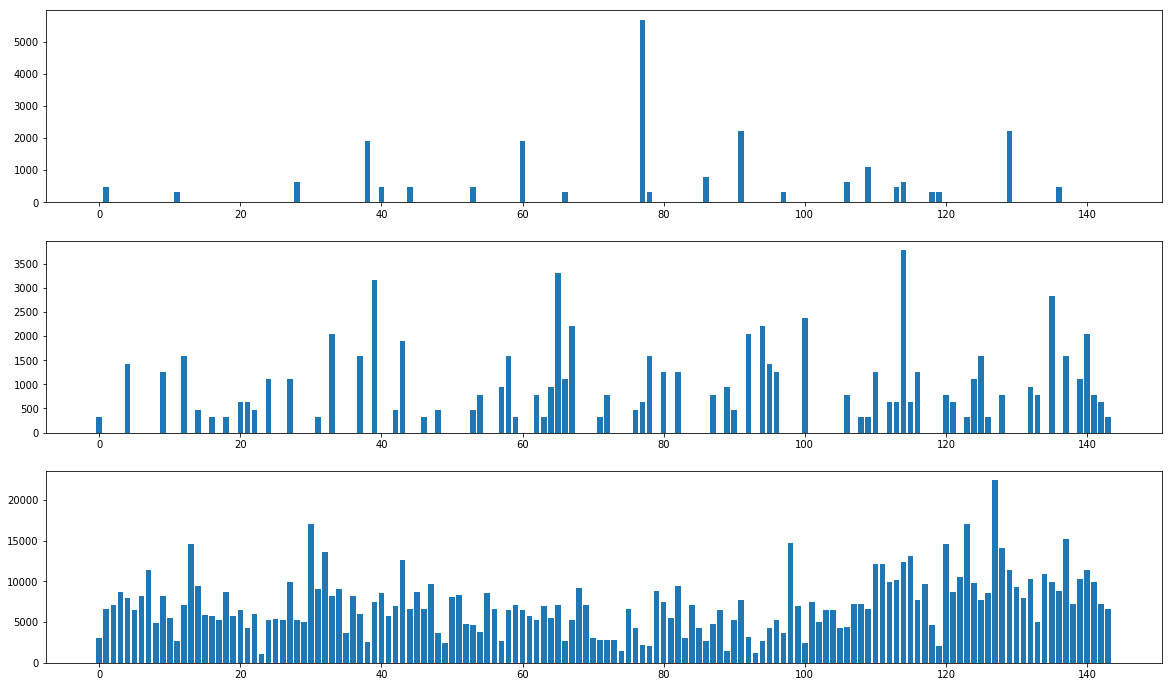

In [59]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20, 12))
ax1=plt.subplot(3, 1, 1)
ax2=plt.subplot(3, 1, 2)
ax3=plt.subplot(3, 1, 3)

ax1.bar(np.arange(len(acclist[0])),acclist[0])
ax2.bar(np.arange(len(acclist[1])),acclist[1])
ax3.bar(np.arange(len(acclist[2])),acclist[2])

<BarContainer object of 144 artists>

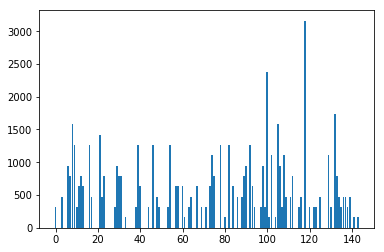

In [19]:
matplotlib.pyplot.bar(np.arange(len(acclist[1])),acclist[1])

<BarContainer object of 144 artists>

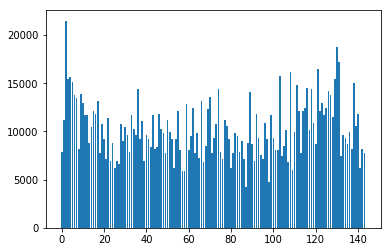

In [20]:
matplotlib.pyplot.bar(np.arange(len(acclist[2])),acclist[2])

In [38]:
x = df.loc[df['road1'] == 77]['accident_type_hebrew'].value_counts()/df.loc[df['road1'] == 77]['accident_type_hebrew'].count()
x['נפילה מרכב נע']


0.0011237533361427166

In [70]:
labels = df['accident_type_hebrew'].unique()
labels.size

21

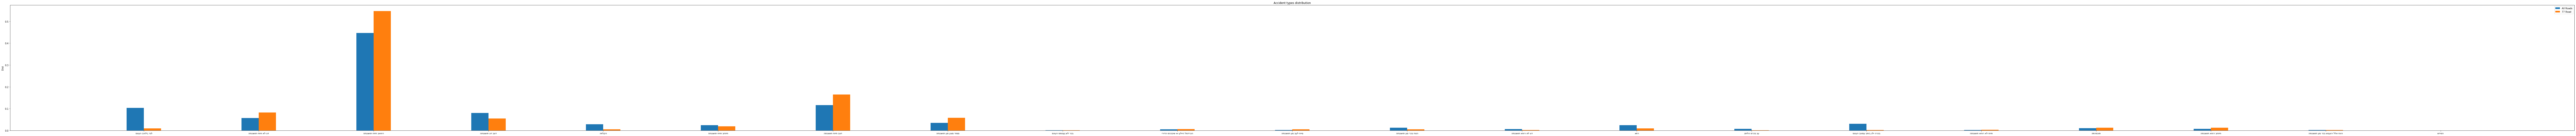

In [58]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def listOrderedByLabel(df, labels):
    orderedDf = []
    for label in labels:
        try:
            orderedDf.append(df[label])
        except KeyError:
            orderedDf.append(0)
    return orderedDf

accidents_distribution_all = df['accident_type_hebrew'].value_counts()/ \
                             df['accident_type_hebrew'].count()
accidents_distribution_road77 = df.loc[df['road1'] == 77]['accident_type_hebrew'].value_counts()/ \
                                df.loc[df['road1'] == 77]['accident_type_hebrew'].count()
labels = df['accident_type_hebrew'].unique()

all_accidents = listOrderedByLabel(accidents_distribution_all, labels)
road77_accidents = listOrderedByLabel(accidents_distribution_road77, labels)







# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

# fig.tight_layout()



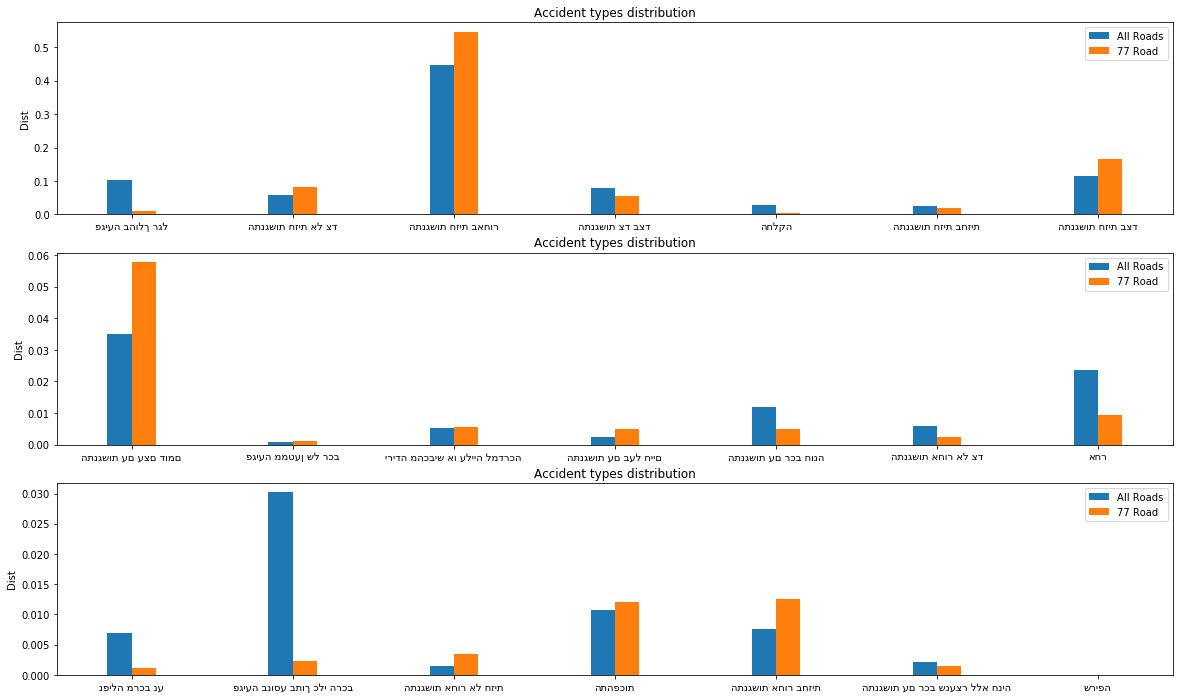

In [75]:
from bidi import algorithm as bidialg
import matplotlib.pyplot as plt
text = bidialg.get_display(u'שלום כיתה א')
plt.text(0.5, 0.5, text , name = 'Arial')


x = np.arange(len(labels)/3) # the label locations
width = 0.15  # the width of the bars

fig = plt.figure(figsize=(20, 12))
ax1=plt.subplot(3, 1, 1)
ax2=plt.subplot(3, 1, 2)
ax3=plt.subplot(3, 1, 3)

rects11 = ax1.bar(x - width/2, all_accidents[:7], width, label='All Roads')
rects21 = ax1.bar(x + width/2, road77_accidents[:7], width, label='77 Road')

rects12 = ax2.bar(x - width/2, all_accidents[7:14], width, label='All Roads')
rects22 = ax2.bar(x + width/2, road77_accidents[7:14], width, label='77 Road')

rects13 = ax3.bar(x - width/2, all_accidents[14:], width, label='All Roads')
rects23 = ax3.bar(x + width/2, road77_accidents[14:], width, label='77 Road')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Dist')
ax1.set_title('Accident types distribution')
ax1.set_xticks(x)
ax1.set_xticklabels(labels[:7])
ax1.legend()

ax2.set_ylabel('Dist')
ax2.set_title('Accident types distribution')
ax2.set_xticks(x)
ax2.set_xticklabels(labels[7:14])
ax2.legend()

ax3.set_ylabel('Dist')
ax3.set_title('Accident types distribution')
ax3.set_xticks(x)
ax3.set_xticklabels(labels[14:])
ax3.legend()



